In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


PIMA Diabetes Dataset

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/diabetes.csv

--2022-03-23 04:58:37--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/diabetes.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.144.38
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.144.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.1s    

2022-03-23 04:58:38 (174 KB/s) - ‘diabetes.csv.1’ saved [23873/23873]



In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('diabetes.csv') 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# number of missing values in each column
#df.isnull().sum().sum()==0
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## EDA

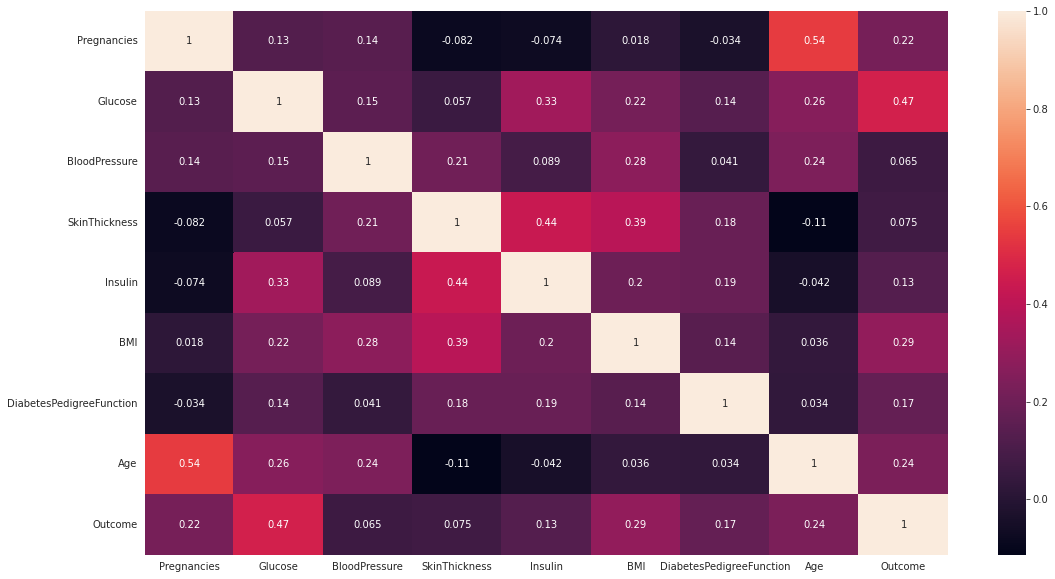

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

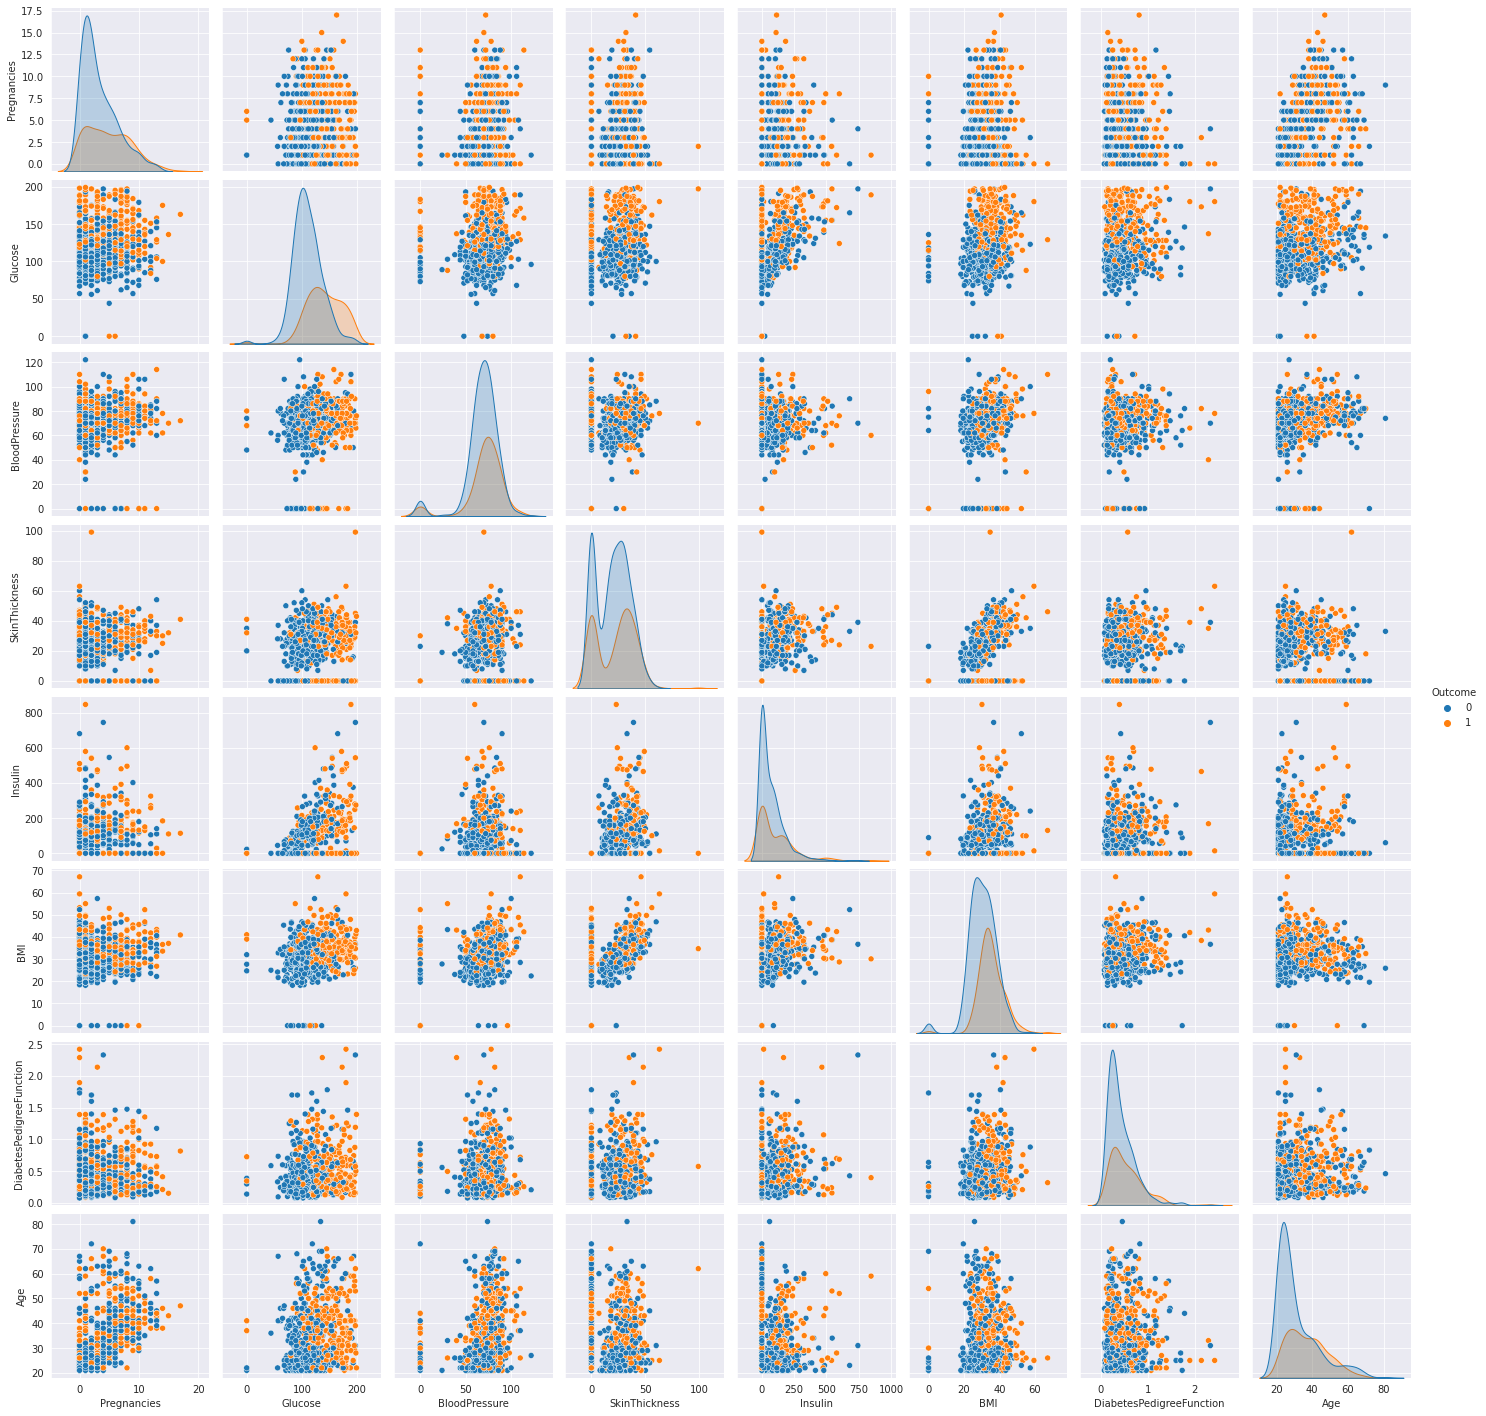

In [ ]:
sns.pairplot(df,hue='Outcome');

In [ ]:
# separating the data and labels
X_ = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

Data Standardization

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
y = df['Outcome']

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Verify overfitting with RandomForest

>1, train: 0.704, test: 0.695
>2, train: 0.774, test: 0.727
>3, train: 0.809, test: 0.747
>4, train: 0.837, test: 0.760
>5, train: 0.865, test: 0.747
>6, train: 0.893, test: 0.740
>7, train: 0.936, test: 0.701
>8, train: 0.958, test: 0.727
>9, train: 0.987, test: 0.747
>10, train: 0.997, test: 0.747
>11, train: 0.998, test: 0.753
>12, train: 0.998, test: 0.753
>13, train: 1.000, test: 0.727
>14, train: 0.998, test: 0.747
>15, train: 1.000, test: 0.734
>16, train: 1.000, test: 0.747
>17, train: 1.000, test: 0.753
>18, train: 1.000, test: 0.747
>19, train: 1.000, test: 0.747
>20, train: 1.000, test: 0.747


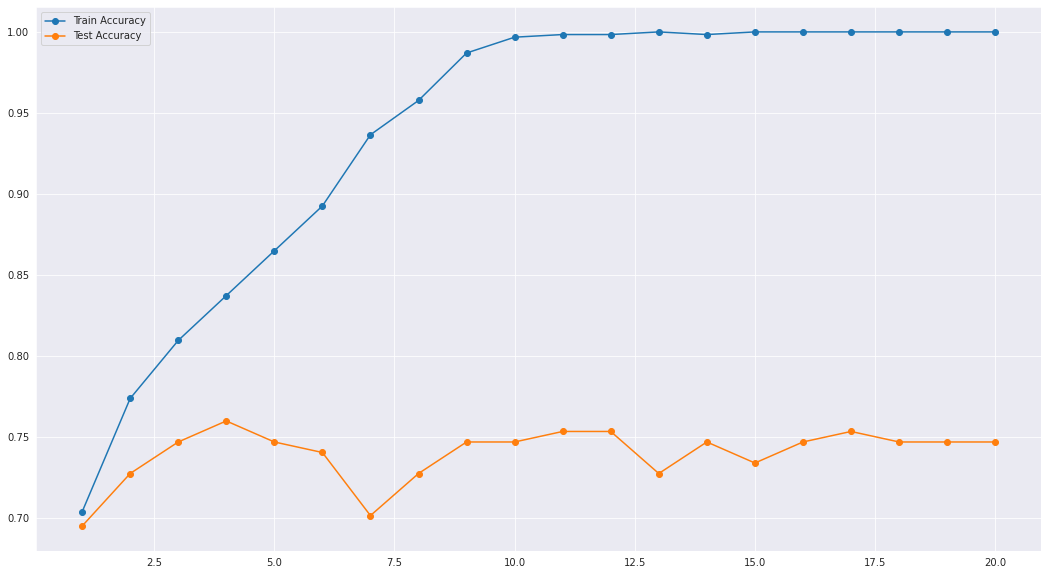

In [ ]:
train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

Training the Model

In [ ]:
## one of the best fit is with depth=4 --> train: 0.837, test: 0.760

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=667)

Text(0.5, 0, 'Relative Importance')

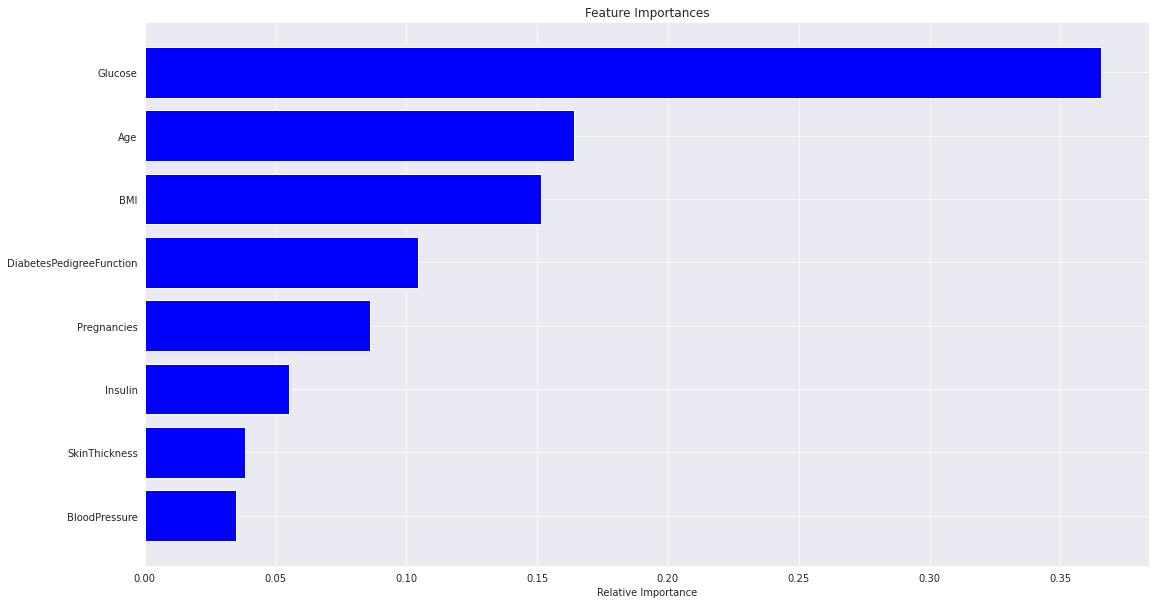

In [ ]:
#Feature importance for Random Forest
features = X_.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Model Evaluation

In [ ]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7597402597402597


In [ ]:
labels = ['Non-Diabetic', 'Diabetic']

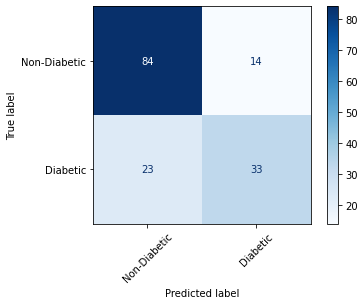

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

Non-Diabetic       0.79      0.86      0.82        98
    Diabetic       0.70      0.59      0.64        56

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



## ROC Curves

In [ ]:
!pip install plot-metric --quiet

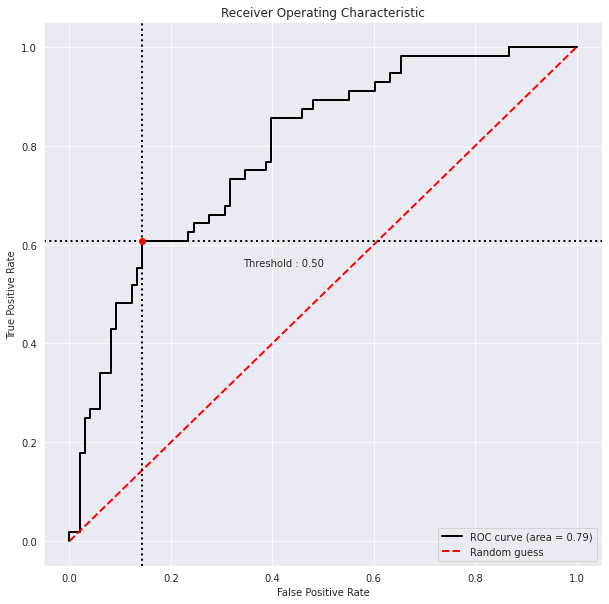

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

## P-R Curves

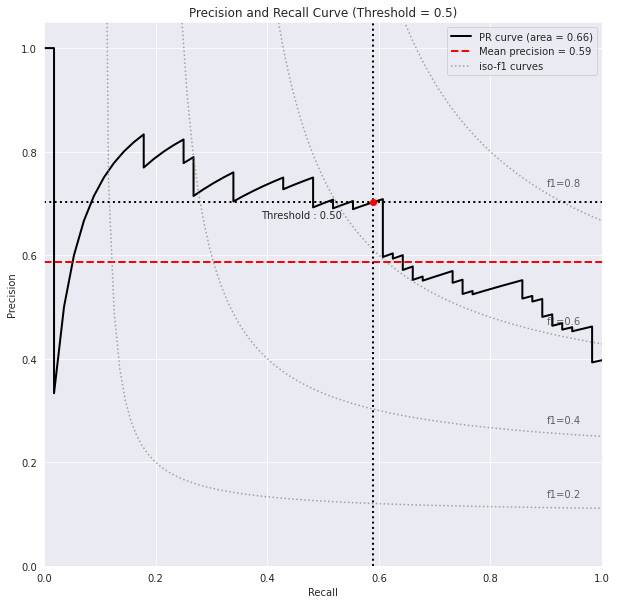

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

### Making a Predictive System + Normalization

In [ ]:
input_data = [5,166,72,19,175,25.8,0.587,51]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
1
The person is diabetic


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4))
        ])

#training the support vector Machine Classifier
pipe.fit(X_train, y_train)
# accuracy score on the test data
y_pred = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7467532467532467


In [ ]:
input_data = [5,166,72,19,175,25.8,0.587,51]

prediction = pipe.predict([input_data])
print(prediction[0])

if (y_pred[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

1
The person is diabetic


In [ ]:
import joblib
joblib.dump(pipe,'pipe_diabetic.pkl')

['pipe_diabetic.pkl']

In [ ]:
uploaded_model = joblib.load('pipe_diabetic.pkl')

uploaded_model.predict([input_data])[0] #0 means Diabetic

1